In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy
from rtbm import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

# Example 1: Sine-Mixture with gaussian noise

In [2]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

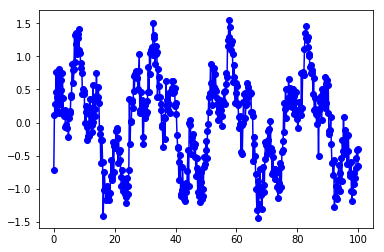

In [3]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [4]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

CMA on 1 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=379237, Sat Oct 28 17:05:24 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 4.993011347949945e-01 1.0e+00 9.38e-01  9e-01  9e-01 0:02.4
    2     28 5.128269256510877e-01 1.1e+00 9.04e-01  9e-01  9e-01 0:04.8
    3     42 5.242632886422264e-01 1.1e+00 8.74e-01  9e-01  9e-01 0:07.1
    5     70 4.858666854824731e-01 1.1e+00 8.56e-01  8e-01  9e-01 0:11.5
    7     98 4.466074986475405e-01 1.2e+00 8.63e-01  8e-01  9e-01 0:16.1
   10    140 4.394142253299361e-01 1.2e+00 8.73e-01  9e-01  9e-01 0:22.8
   13    182 4.609309088529274e-01 1.3e+00 7.90e-01  8e-01  8e-01 0:29.6
   17    238 4.462289901649068e-01 1.3e+00 6.75e-01  6e-01  7e-01 0:36.8


In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,100))
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, maxiter=100)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.xaxis("t")
plt.yaxis("y(t)")
plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [ ]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:1000,0]
X_train = MNIST_train[0:1000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(784,10))
M.add(layers.DiagExpectationUnitLayer(10,1))


#M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#T=enc.transform(Y_train)

# ToDo: Use cross-entropy

In [ ]:
minim = minimizer.CMA(True)

minim.train(mse,M, np.transpose(X_train), np.transpose(Y_train), maxiter=100)

In [ ]:
P=np.real(M.predict(np.transpose(X_test)))

#where_are_NaNs = np.isnan(P)
#P[where_are_NaNs] = 0
P = np.abs(np.round(P))
#P=P.reshape(P.shape[0],)

print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))